# Objective of the project
To build a predictive model that leverages both the demographic characteristics of credit card owners and their payment history to estimate the likelihood of credit default. 

## Importing Packages and Loading Data

In [2]:
# Data manipulation liabraries
import numpy as np 
import pandas as pd
from pandas import set_option

# Data visualization liabraries
import matplotlib.pyplot as plt 
import seaborn as sns  
pd.set_option('display.max_columns', None) # for showing maximum columns
plt.style.use('ggplot') # nice plots

# Model building 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Warnings
import warnings
warnings.filterwarnings("ignore")

D:\D\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('C:/Users/user/Desktop/Projects/ineuron/Credit_card/UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

## About Dataset
- ID: A unique identifier for each credit card holder.
- LIMIT_BAL: The credit limit of the cardholder.
- SEX: Gender of the cardholder (1 = male, 2 = female).
- EDUCATION: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others).
- MARRIAGE: Marital status (1 = married, 2 = single, 3 = others).
- AGE: Age of the cardholder.
- PAY_0 to PAY_6: Payment status for the last 6 months. It seems to represent the repayment status, with -1 meaning payment delay for one month, -2 meaning payment delay for two months, and so on.
- BILL_AMT1 to BILL_AMT6: The bill amount for the last 6 months.
- PAY_AMT1 to PAY_AMT6: The amount paid for the last 6 months.
- default.payment.next.month: Whether the cardholder will default next month (1 = yes, 0 = no).

In [4]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- No null values and datatypes are also correct
- There are 30000 records in the dataset

In [6]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  30000.000000  
mean      -0.291100  
std        1.149988  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [7]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   30000.000000   30000.000000  
mean    40311.400967   38871.760400  
std     60797.155770   59554.107537  
min    -81334.000000 -339603.000000  
25%      1763.000000    1256.000000  
50%     18104.500000   17071.000000  
75%     50190.500000   49198.250000  
max    927171.000000  961664.000000

In [8]:
# Payment History Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000

# Data Cleaning

In [9]:
# renaming columns
df.rename(columns={"default.payment.next.month": "def_pay", 'PAY_0': 'PAY_1'}, inplace=True)
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   def_pay  
0        1  
1        1  
2        0  
3        0  
4        0

#### By replacing the undocumented values present in the dataframe, we assign them to meaningful categories.

- In the "MARRIAGE" column, replacing 0 (undocumented) with 3 categorizes it as "Other," which provides clarity about the marital status of individuals not categorized into the primary categories (1 for married and 2 for single).
- In the "EDUCATION" column, replacing 0 (undocumented), 5, and 6 (label unknown) with 4 categorizes them as "Other," which indicates that they fall into a category that doesn't correspond to the primary education levels (e.g., graduate school, university, high school).

In [10]:
# Replace the undocumented or mislabeled values in the "MARRIAGE" column
df['MARRIAGE'].replace({0: 3}, inplace=True)

# Replace the undocumented or mislabeled values in the "EDUCATION" column
df['EDUCATION'].replace({0: 4, 5: 4, 6: 4}, inplace=True)

# Display the first few rows of the updated DataFrame
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   def_pay  
0        1  
1        1  
2        0  
3        0  
4        0

The "PAY_n" variables indicate the number of months a payment is overdue. A value of "-1" implies that the payment was made on time, as documented. However, the interpretation of "-2" and "0" is somewhat ambiguous. To enhance clarity, it's advisable to redefine "on-time payment" as 0.

In [11]:
# Define a function to replace specific payment statuses with 0 (on-time payment)
def replace_to_zero(col):
    # Create a filter that selects rows where the values are -2, -1, or 0
    fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
    
    # Use the .loc[] method to update the values in the selected rows and column to 0
    df.loc[fil, col] = 0

# Iterate over the specified columns 'PAY_1' through 'PAY_6'
for i in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    # Apply the replace_to_zero function to redefine payment statuses
    replace_to_zero(i)

#### Updated categories are as following:

##### SEX:

- 1 = male 
- 2 = female

##### EDUCATION:

- 1 = graduate school 
- 2 = university 
- 3 = high school 
- 4 = others 

##### MARRIAGE:

- 1 = married
- 2 = single
- 3 = others

##### PAY_0,2,3,4,5,6:

- 0 = paid duly
- 1 = payment delay for one month
- 2 = payment delay for two months
          ... 
- 8 = payment delay for eight months
- 9 = payment delay for nine months and above

# Exploratory Data Analysis (EDA)

## Calculating the percentage of defaulters in the data

Percentage of Defaulters: 22.12%


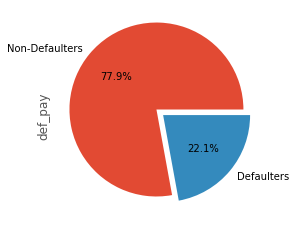

In [12]:
# Assuming 'def_pay' is the column indicating default payment
total_records = len(df)

# Count the number of defaulters (where 'def_pay' is 1)
defaulters = df[df['def_pay'] == 1]
num_defaulters = len(defaulters)

# Calculate the percentage of defaulters
percentage_defaulters = (num_defaulters / total_records) * 100

print(f"Percentage of Defaulters: {percentage_defaulters:.2f}%")

# Create a pie chart to visualize the distribution of defaulters and non-defaulters
df['def_pay'].value_counts().plot(kind='pie', explode=[0.1, 0], labels = ['Non-Defaulters', 'Defaulters'], autopct="%1.1f%%")
plt.show()

## Visualizing Payment Status Over Time (Late Payment Histograms) (PAY_X)

In [13]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    # Create a grid of subplots with the specified number of rows and columns
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
    
    # Loop through the list of variables to create histograms for each variable
    for i, var_name in enumerate(variables):
        row = i // n_cols  # Calculate the row index for the subplot
        col = i % n_cols   # Calculate the column index for the subplot
        
        # Create a histogram for the current variable and place it in the grid
        sns.histplot(data=df, x=var_name, bins=n_bins, ax=axes[row, col])
        
        # Set the title of the subplot to the variable name
        axes[row, col].set_title(var_name)
    
    # Ensure that subplots are well-arranged in the figure
    fig.tight_layout()
    plt.show()

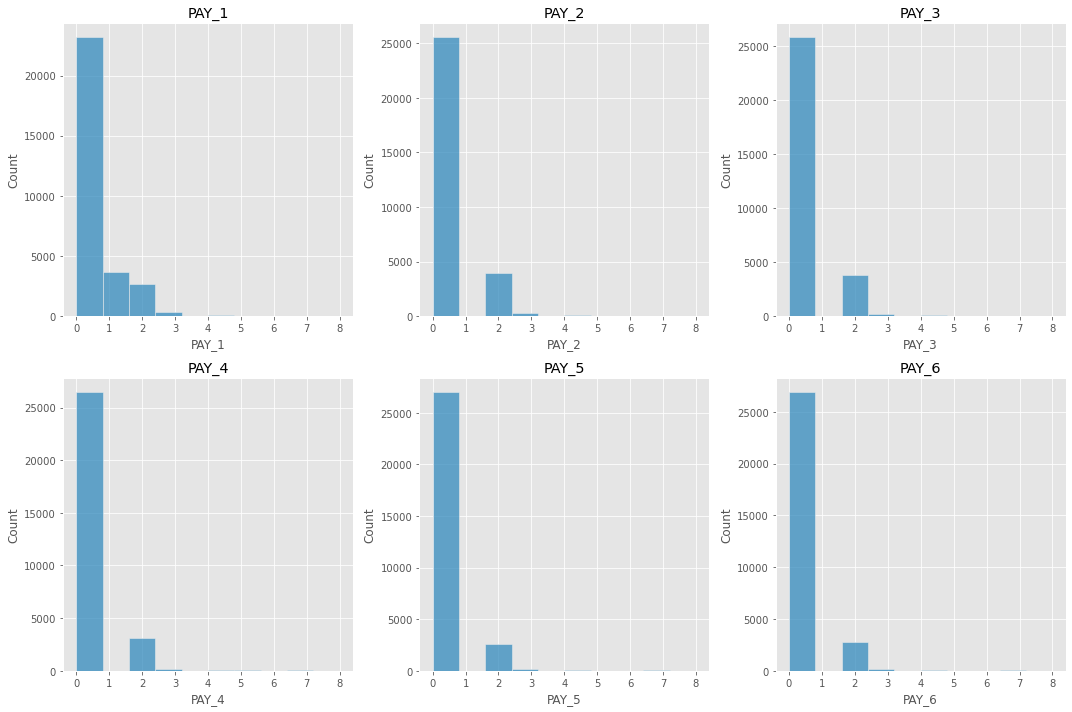

In [14]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

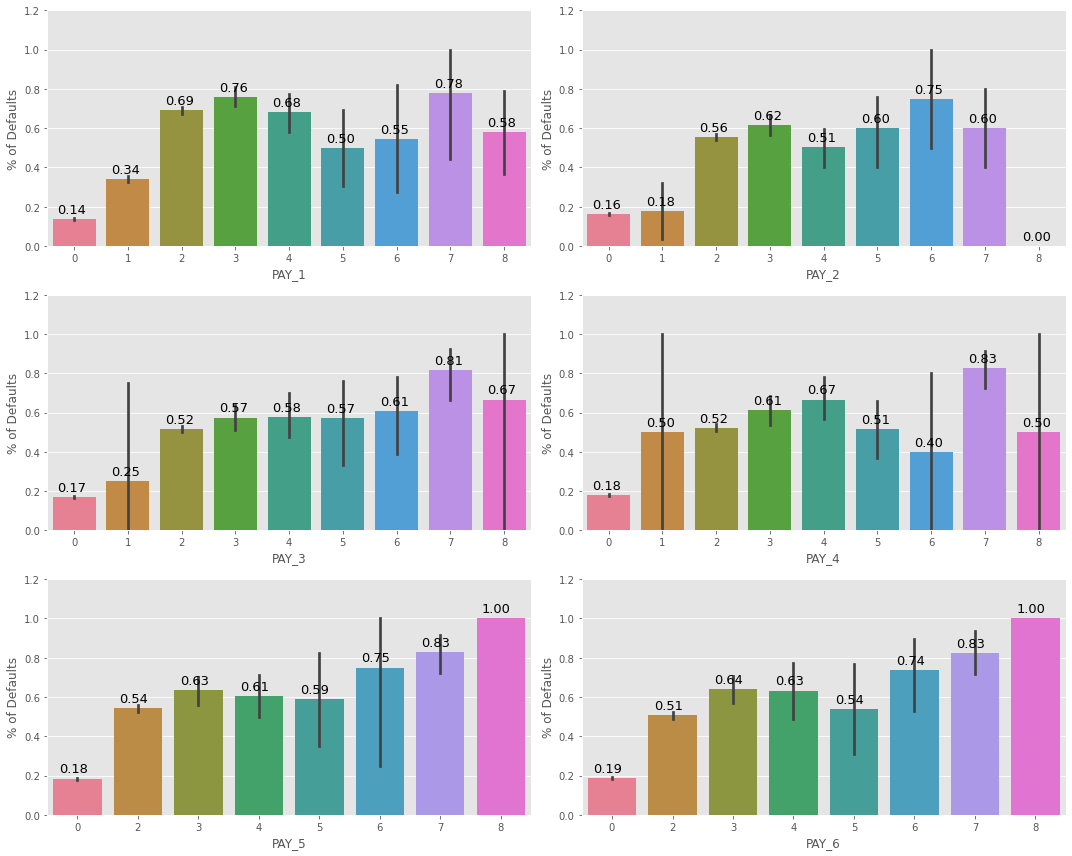

In [25]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15, 12))

for i, col in enumerate(pay_x_fts):
    # Create subplots with 3 rows and 2 columns
    plt.subplot(3, 2, i + 1)
    
    # Create a bar plot for the current payment status column
    ax = sns.barplot(x=col, y="def_pay", data=df, palette='husl')
    plt.ylabel("% of Defaults", fontsize=12)
    plt.ylim(0, 1.2)     # Limit the y-axis to ensure percentages don't exceed 120%
    plt.tight_layout()   # Ensure subplots are well-arranged within the figure
    
    # Annotate each bar with the corresponding percentage
    for p in ax.patches:
        ax.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.09, p.get_height() + 0.03), fontsize=13)
plt.show()

It provides a clear visualization of the relationship between payment status and the percentage of defaults for each month. It helps us understand how payment behavior in different months is associated with the likelihood of default.

###### Observation 1: Payment Behavior and Default Probability

- Majority of Customers: Most credit card holders are consistently making their payments on time. This is evident as a significant portion of customers falls into the '0' and '-1' payment categories, signifying on-time payments.

- Lower Default Likelihood: The data shows that credit card holders with a history of on-time payments ('0' and '-1') have a much lower likelihood of defaulting on their payments. This indicates a strong negative correlation between timely payments and the probability of default.

###### Observation 2: Payment Delays and Default Risk

- Delayed Payments: Credit card holders who consistently delay their payments for more than 3 months are significantly more likely to face defaults.

- High Default Probability: Customers with payment delays beyond 3 months exhibit a notably higher probability of default. This implies a strong positive association between extended payment delays and increased default risk.

## Visualizing the Distribution of Bill Amounts (BILL_AMTX) for Default and Non-Default Customers

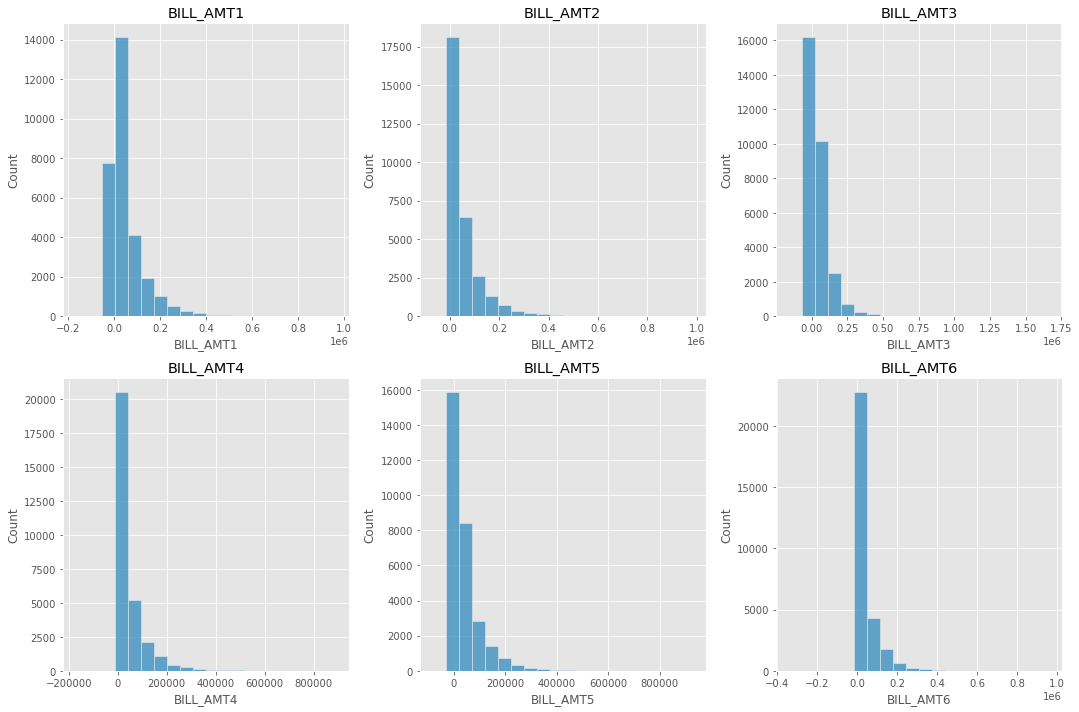

In [27]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Extract the bill amount data for these columns
bills = df[bill_amtx_fts]

# Create histograms for bill amounts
draw_histograms(bills, bills.columns, 2, 3, 20)

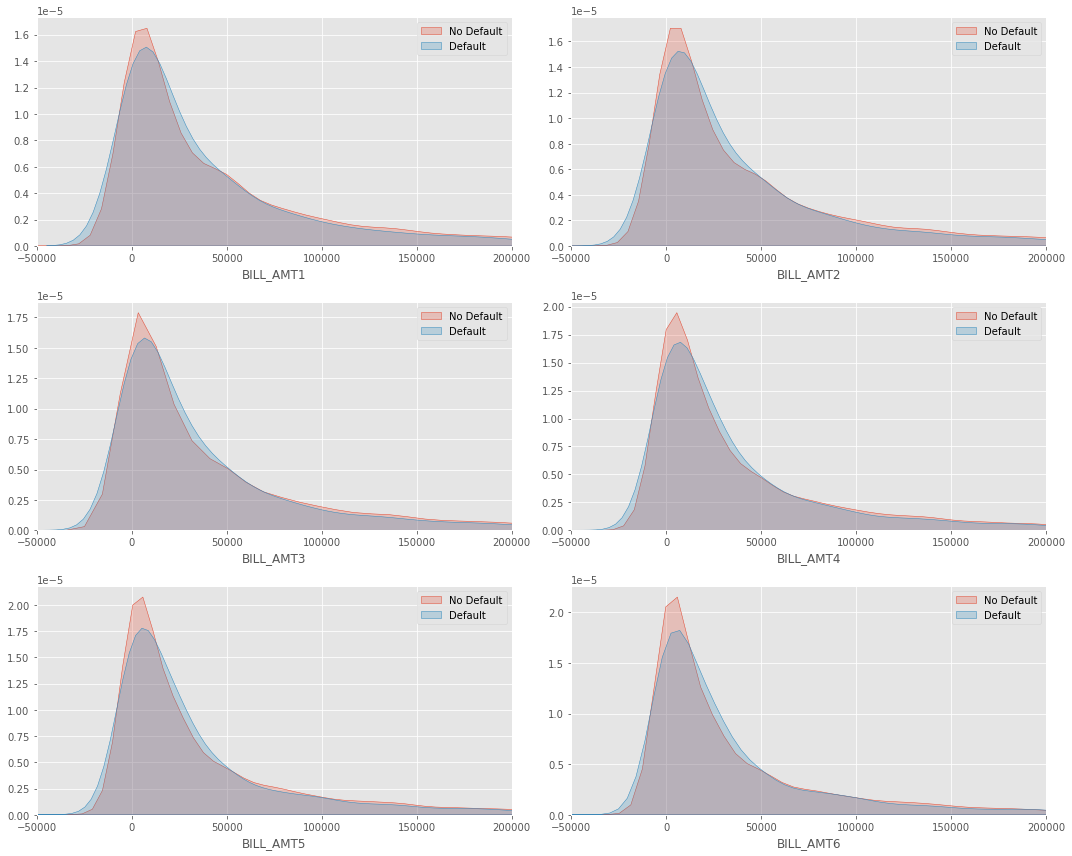

In [28]:
# Code for generating Kernel Density Estimation (KDE) plots to visualize the distribution of bill amounts for customers with and without defaults.
plt.figure(figsize=(15, 12))

# Loop through each bill amount column
for i, col in enumerate(bill_amtx_fts):
    plt.subplot(3, 2, i + 1)                 
    
    # Create KDE plots for customers with no default (label = 'No Default')
    sns.kdeplot(df.loc[(df['def_pay'] == 0), col], label='No Default', fill=True)
    
    # Create KDE plots for customers with default (label = 'Default')
    sns.kdeplot(df.loc[(df['def_pay'] == 1), col], label='Default', fill=True)
    plt.xlim(-50000, 200000)       # Limit the x-axis range for better visualization
    plt.ylabel('')                 # Remove y-axis label
    plt.legend()                   # Display legend for 'No Default' and 'Default'
    plt.tight_layout()
plt.show()

The code is used to visually explore and understand the distribution of bill amounts and how it relates to credit card defaults. It provides valuable insights into customer behavior and the associated default risk, which is essential for financial analysis and decision-making in the context of credit risk assessment.

Binning is a common data preprocessing step that allows you to convert continuous numerical data into discrete categories, which can be useful for various analyses and modeling tasks. Making bins will give us more clear analysis of this section.

In [29]:
# Create new columns by copying bill amount columns
df['BILL_AMT1_bin'] = df['BILL_AMT1'].copy()
df['BILL_AMT2_bin'] = df['BILL_AMT2'].copy()
df['BILL_AMT3_bin'] = df['BILL_AMT3'].copy()
df['BILL_AMT4_bin'] = df['BILL_AMT4'].copy()
df['BILL_AMT5_bin'] = df['BILL_AMT5'].copy()
df['BILL_AMT6_bin'] = df['BILL_AMT6'].copy()

In [30]:
# List of binned bill amount columns
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

# Loop through each binned column and perform binning
for i, col in enumerate(bill_amtx_bins):
    # Use pd.cut() to create bins for the corresponding bill amount column (bill_amtx_fts[i])
    df[col] = pd.cut(df[bill_amtx_fts[i]], [-350000, -1, 0, 25000, 75000, 200000, 2000000])

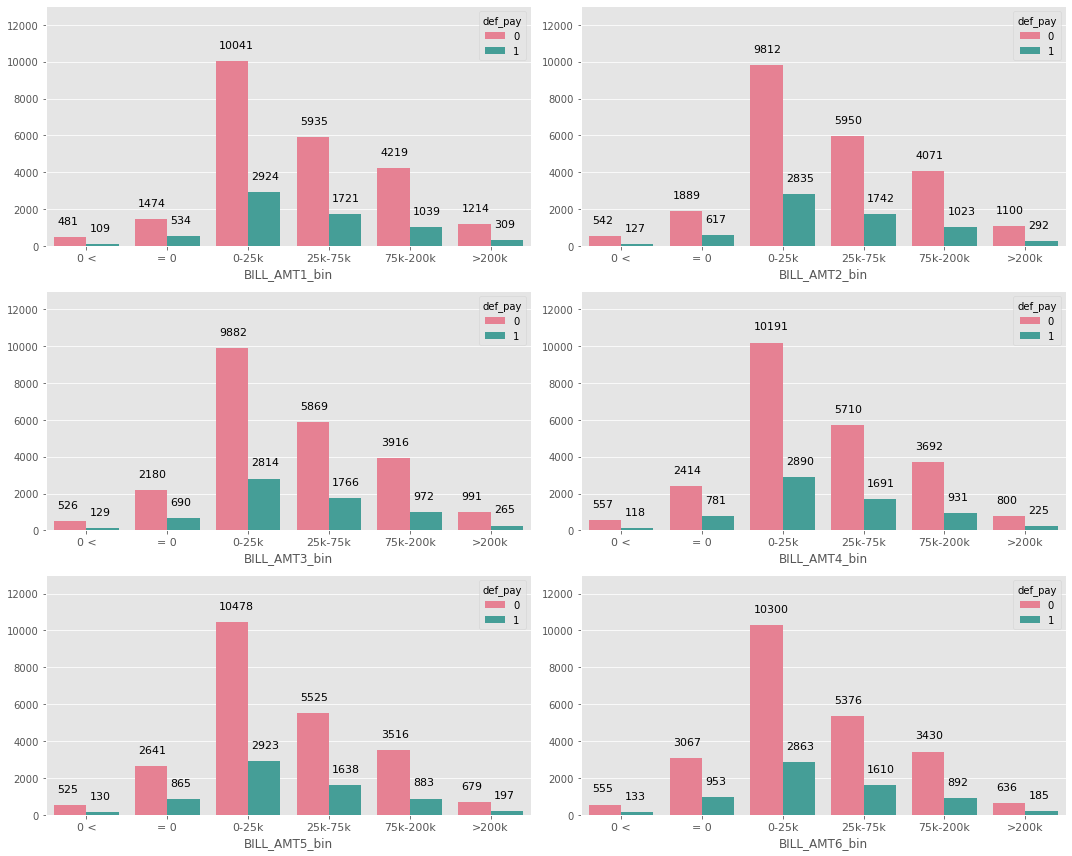

In [31]:
plt.figure(figsize=(15, 12))

# Loop through each binned bill amount column
for i, col in enumerate(bill_amtx_bins):
    plt.subplot(3, 2, i + 1)
    
    # Create count plots for binned bill amounts, distinguishing by defaults
    ax = sns.countplot(data=df, x=col, hue="def_pay", palette='husl')
    plt.ylim(0, 13000)           # Set the y-axis limit for better visualization
    plt.ylabel('')               # Remove y-axis label
    
    # Customize x-axis labels
    plt.xticks([0, 1, 2, 3, 4, 5], ['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize=11)
    plt.tight_layout()
    
    # Annotate each bar with the count
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + 0.04, p.get_height() + 700), fontsize=11)
plt.show()

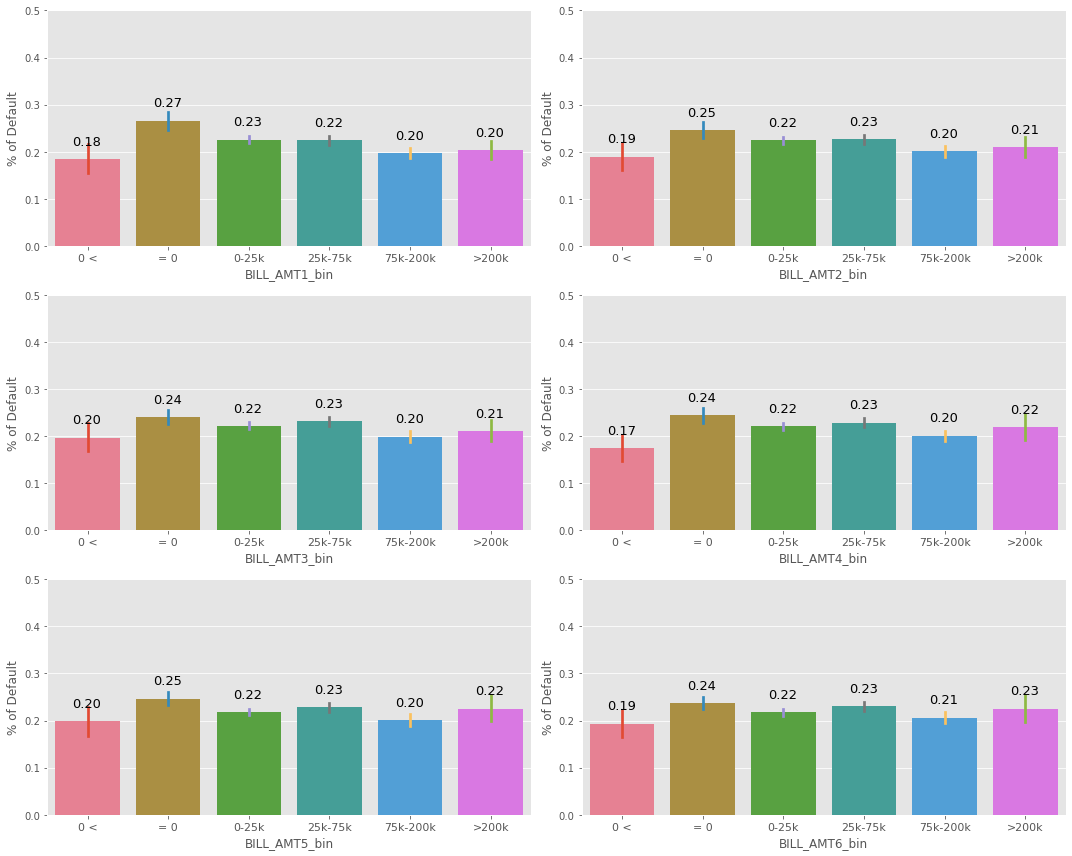

In [32]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(bill_amtx_bins):
    plt.subplot(3, 2, i + 1)
    
    # Create bar plots to show the percentage of defaults by binned bill amount
    ax = sns.barplot(x=col, y="def_pay", data=df, palette='husl', errcolor=None)
    plt.ylabel("% of Default", fontsize=12)
    plt.ylim(0, 0.5)        # Set the y-axis limit for better visualization
    
    # Customize x-axis labels to represent the bin categories
    plt.xticks([0, 1, 2, 3, 4, 5], ['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize=11)
    plt.tight_layout()
    
    # Annotate each bar with the percentage value
    for p in ax.patches:
        ax.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.21, p.get_height() + 0.03), fontsize=13)
plt.show()

###### Observation
- Individuals with a negative bill statement are less likely to experience defaults compared to others. Notably, there is a slightly elevated risk of default among individuals who did not have a bill in the preceding months.

## Visualizing the Distribution of Payment Amounts (PAY_AMTX) for Different Months

Analyzing Variations in Payment Amount Distributions

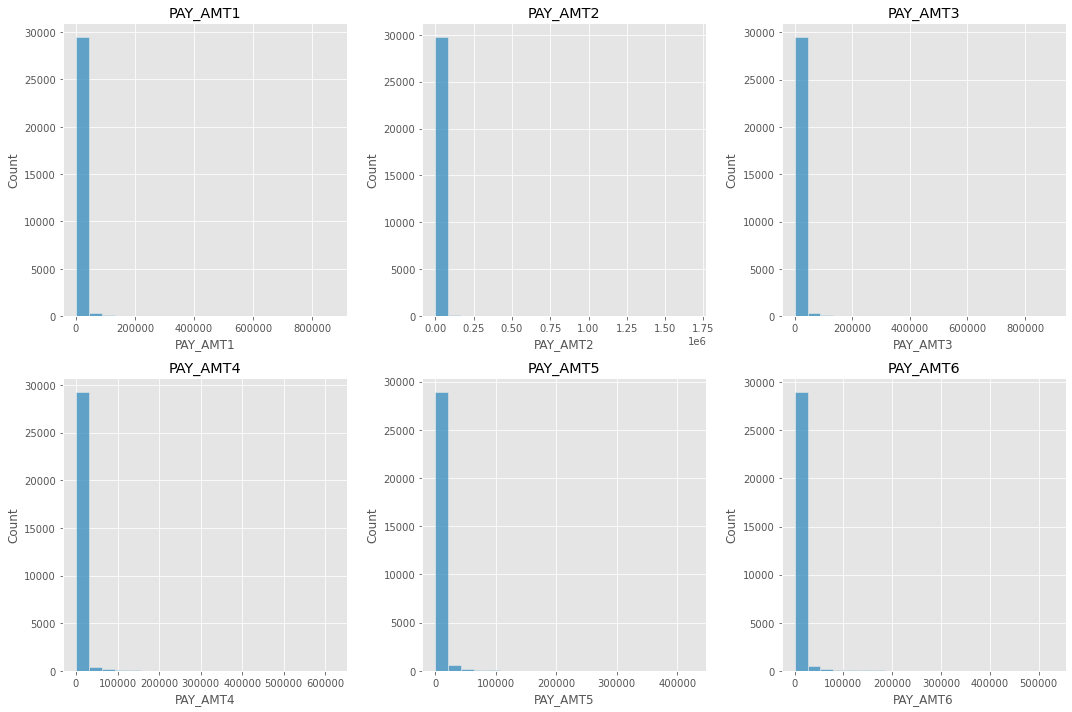

In [33]:
# List of payment amount columns for different months
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Extract the payment amount data for these columns
pay = df[pay_amtx_fts]
draw_histograms(pay, pay.columns, 2, 3, 20)

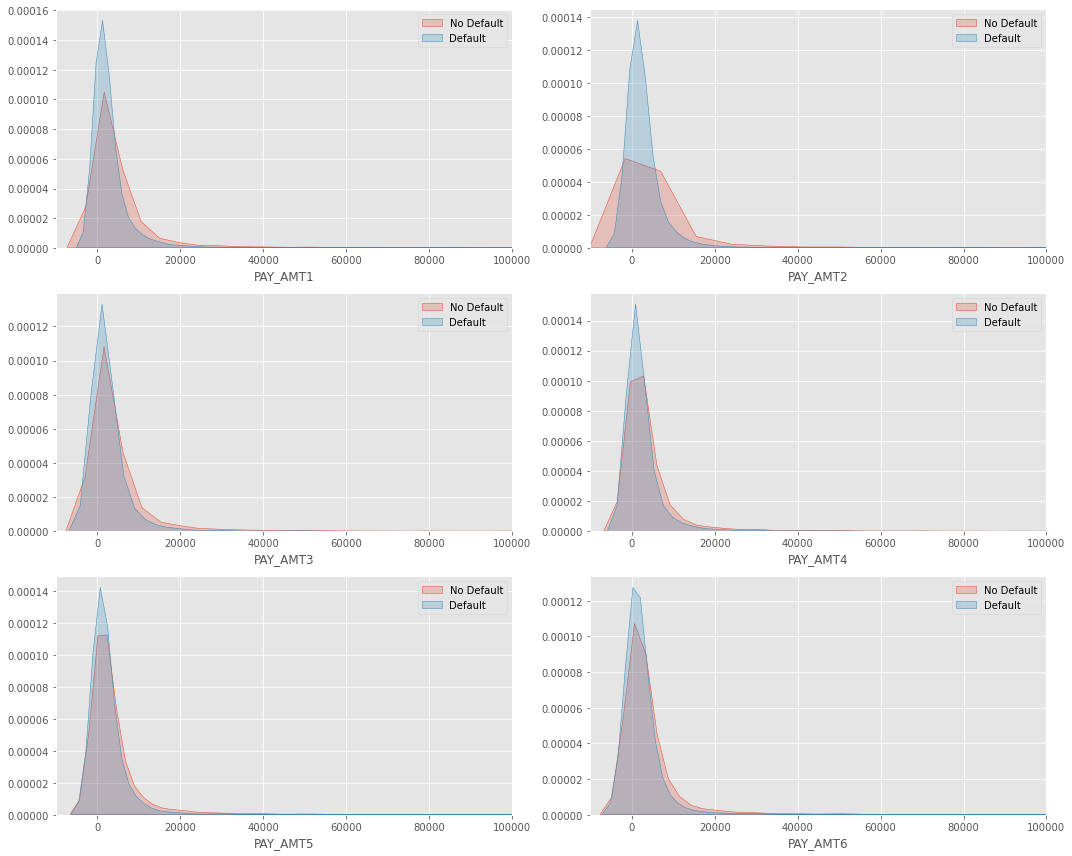

In [34]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(pay_amtx_fts):
    plt.subplot(3, 2, i + 1)
    
    # Create KDE plots for customers with no default (label = 'No Default')
    sns.kdeplot(df.loc[(df['def_pay'] == 0), col], label='No Default', fill=True)
    
    # Create KDE plots for customers with default (label = 'Default')
    sns.kdeplot(df.loc[(df['def_pay'] == 1), col], label='Default', fill=True)
    plt.xlim(-10000, 100000)       # Limit the x-axis range for better visualization
    plt.ylabel('')
    plt.legend()                  # Display legend for 'No Default' and 'Default'
    plt.tight_layout()
plt.show()

In [35]:
df['PAY_AMT1_bin'] = df['PAY_AMT1'].copy()
df['PAY_AMT2_bin'] = df['PAY_AMT2'].copy()
df['PAY_AMT3_bin'] = df['PAY_AMT3'].copy()
df['PAY_AMT4_bin'] = df['PAY_AMT4'].copy()
df['PAY_AMT5_bin'] = df['PAY_AMT5'].copy()
df['PAY_AMT6_bin'] = df['PAY_AMT6'].copy()

In [36]:
# List of binned payment amount columns
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate(pay_amtx_bins):
    # Use pd.cut() to bin payment amounts
    df[col] = pd.cut(df[pay_amtx_fts[i]], [-1, 0, 25000, 50000, 100000, 2000000])

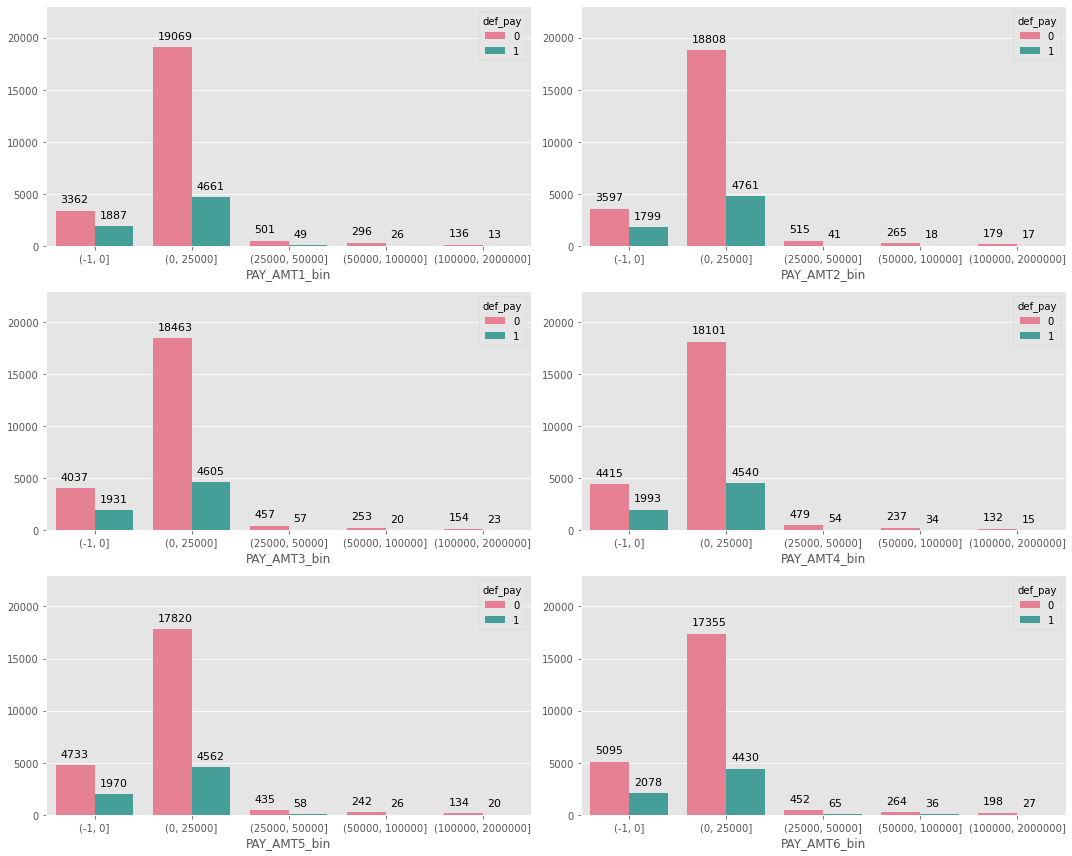

In [38]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(pay_amtx_bins):
    plt.subplot(3, 2, i + 1)
    ax = sns.countplot(data=df, x=col, hue="def_pay", palette='husl')
    plt.ylim(0, 23000)
    plt.ylabel('')
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + 0.05, p.get_height() + 800), fontsize=11)
plt.show()

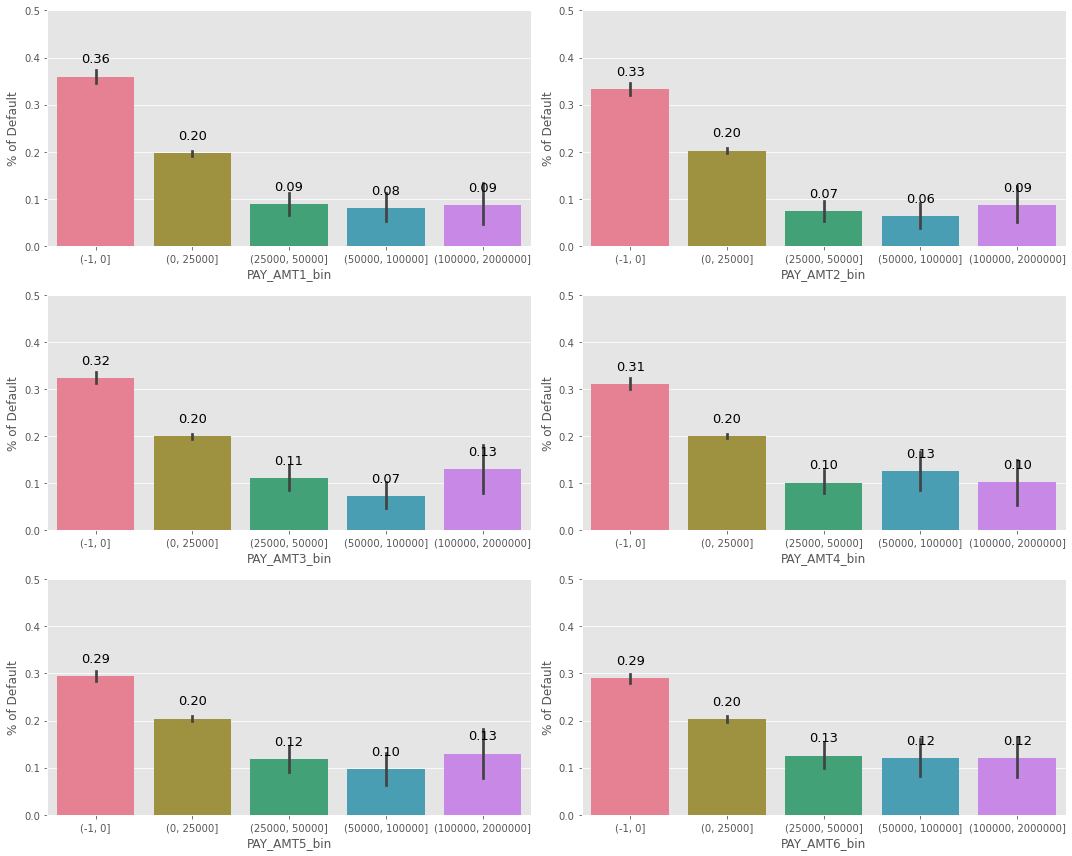

In [39]:
plt.figure(figsize=(15, 12))

# Loop through each binned payment amount column
for i, col in enumerate(pay_amtx_bins):
    plt.subplot(3, 2, i + 1)
    
    # Create a bar plot for the percentage of defaults
    ax = sns.barplot(x=col, y="def_pay", data=df, palette='husl')
    plt.ylabel("% of Default", fontsize=12)               # Set the y-axis label
    plt.ylim(0, 0.5)                                      # Limit the y-axis range for better visualization
    plt.tight_layout()
    
    # Annotate each bar with the percentage value
    for p in ax.patches:
        ax.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.03), fontsize=13)
plt.show()

### Observation:
-  There is a higher default rate among customers who paid nothing in previous months and lower default rates among those who paid over 25,000 NT dollars.

## Exploring the Distribution of Categorical Variables (SEX, EDUCATION, MARRIAGE)

SEX
   Value  Count  Percentage
1      1  11888   39.626667
2      2  18112   60.373333
--------------------------


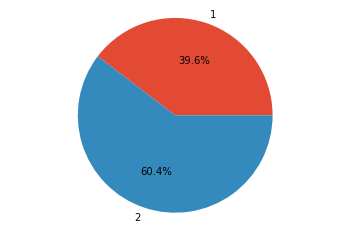

MARRIAGE
   Value  Count  Percentage
1      1  13659   45.530000
2      2  15964   53.213333
3      3    377    1.256667
--------------------------


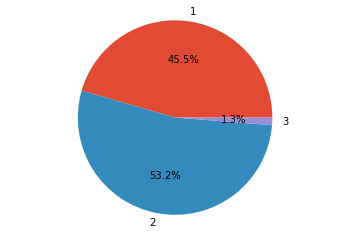

EDUCATION
   Value  Count  Percentage
1      1  10585   35.283333
2      2  14030   46.766667
3      3   4917   16.390000
4      4    468    1.560000
--------------------------


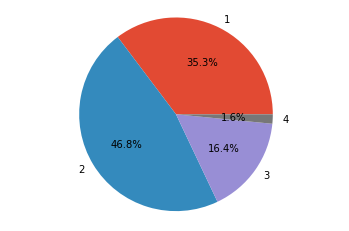

In [40]:
def show_value_counts(col):
    print(col)               # Print the name of the column
    
    # Calculate value counts and percentage of each category
    value_counts = df[col].value_counts()
    percentage = value_counts / len(df) * 100
    
    # Create a DataFrame to display the results
    result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts, 'Percentage': percentage})
    result_df = result_df.sort_values(by='Value')
    
    # Display the DataFrame
    print(result_df)
    print('--------------------------')
    
    # Generate a pie plot using the generate_pie_plot function
    generate_pie_plot(result_df)

def generate_pie_plot(data_frame):
    # Create a pie plot with labels and percentages
    plt.figure(figsize=(6, 4))
    plt.pie(data_frame['Count'], labels=data_frame['Value'], autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

# Show value counts and pie plots for 'SEX', 'MARRIAGE', and 'EDUCATION' columns
show_value_counts('SEX')
show_value_counts('MARRIAGE')
show_value_counts('EDUCATION')

###### Observations:

- Gender Distribution: The dataset contains significantly more women than men. This suggests that the majority of credit card holders in the dataset are female.

- Education Levels: Most of the credit card holders in the dataset have attained a university or graduate-level education. This indicates a higher proportion of customers with higher education.

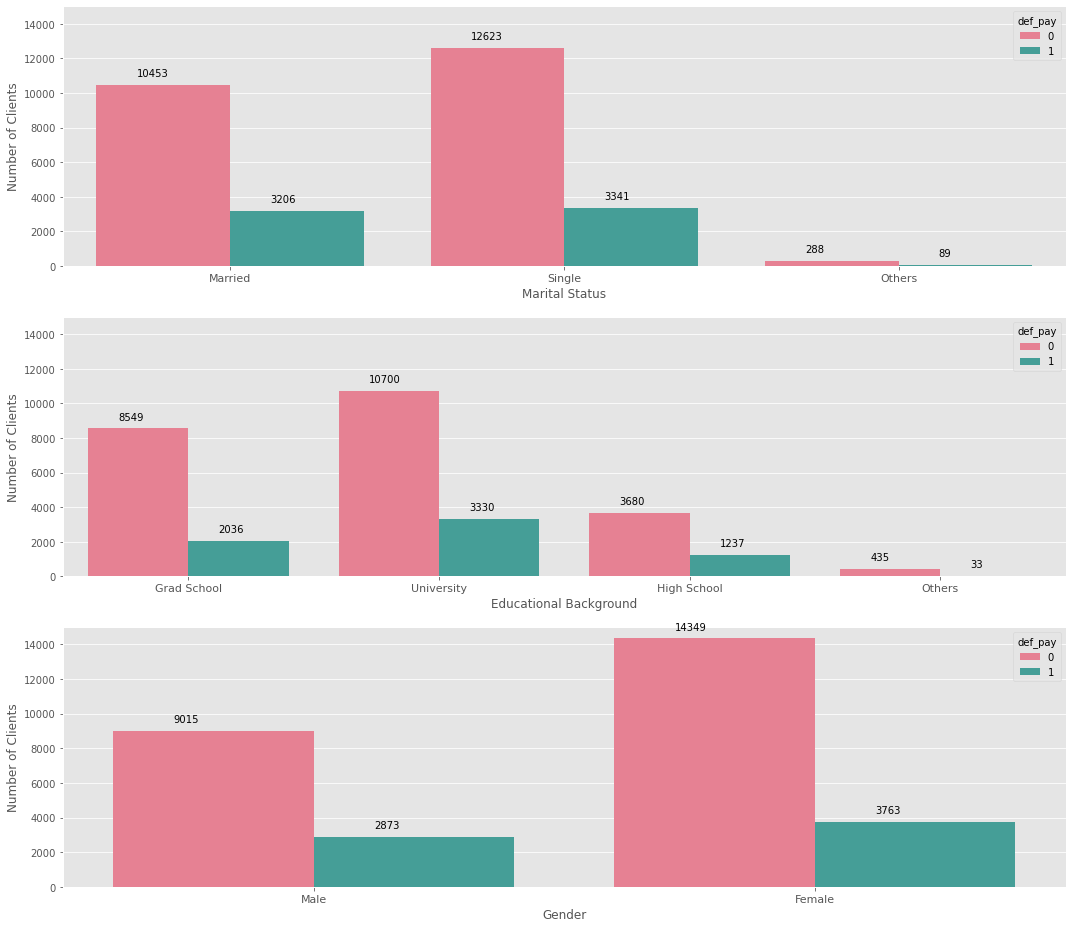

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 13))

# Count plot for MARRIAGE
ax1 = sns.countplot(data=df, x='MARRIAGE', hue='def_pay', palette='husl', ax=axes[0])
ax1.set_xlabel("Marital Status", fontsize=12)
ax1.set_ylabel("Number of Clients", fontsize=12)
ax1.set_ylim(0, 15000)
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Married', 'Single', 'Others'], fontsize=11)
for p in ax1.patches:
    ax1.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

# Count plot for EDUCATION
ax2 = sns.countplot(data=df, x='EDUCATION', hue='def_pay', palette='husl', ax=axes[1])
ax2.set_xlabel("Educational Background", fontsize=12)
ax2.set_ylabel("Number of Clients", fontsize=12)
ax2.set_ylim(0, 15000)
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels(['Grad School', 'University', 'High School', 'Others'], fontsize=11)
for p in ax2.patches:
    ax2.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

# Count plot for SEX
ax3 = sns.countplot(data=df, x='SEX', hue='def_pay', palette='husl', ax=axes[2])
ax3.set_xlabel("Gender", fontsize=12)
ax3.set_ylabel("Number of Clients", fontsize=12)
ax3.set_ylim(0, 15000)
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['Male', 'Female'], fontsize=11)
for p in ax3.patches:
    ax3.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

plt.tight_layout()
plt.show()

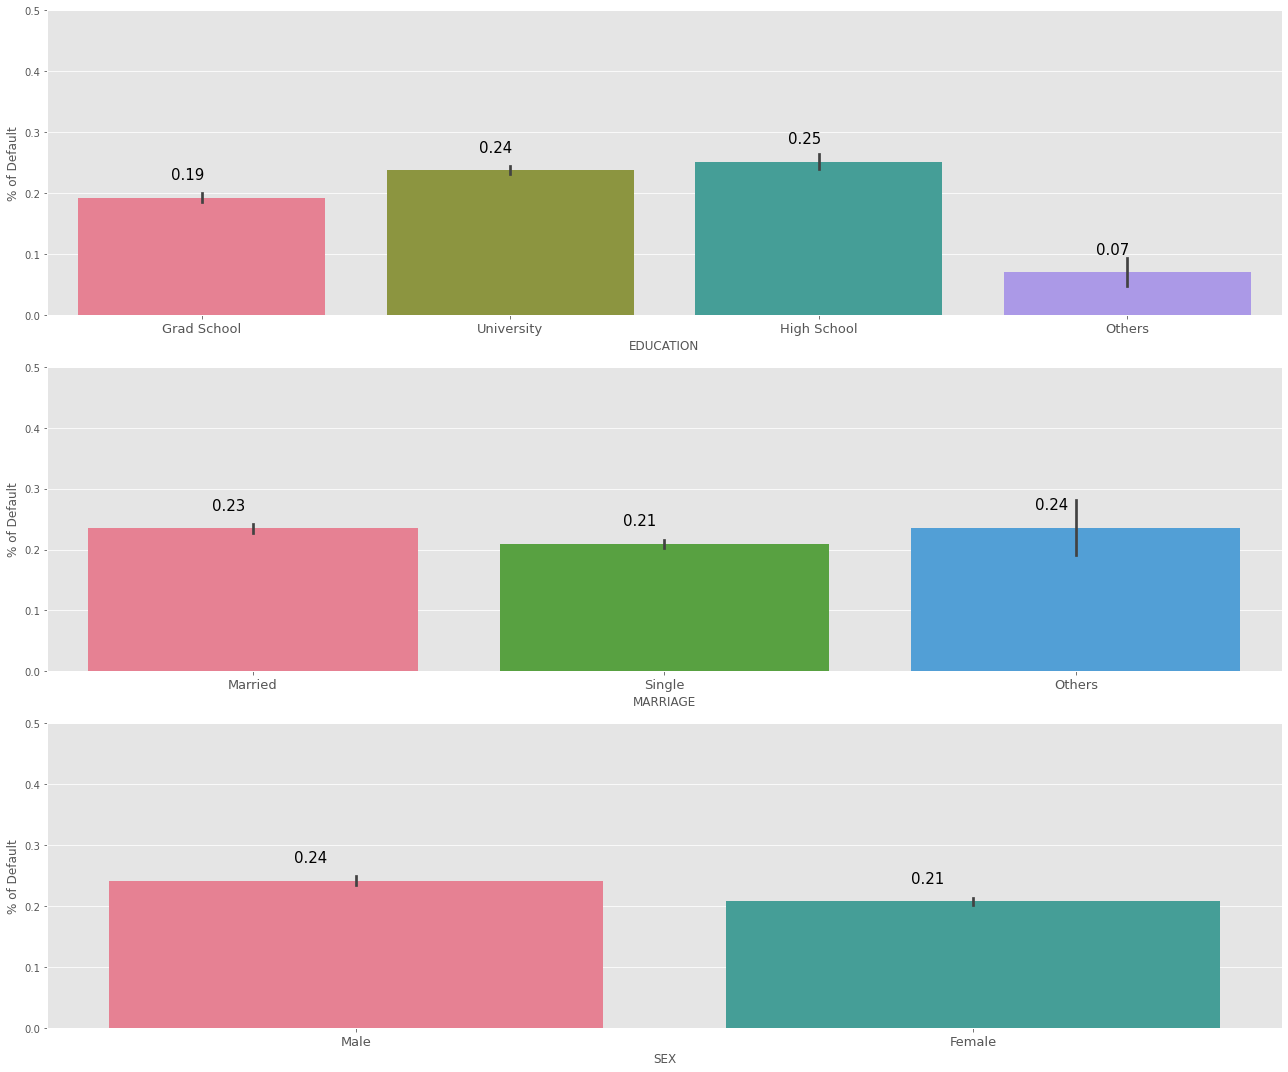

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))

# Bar plot for EDUCATION
ax1 = sns.barplot(x="EDUCATION", y="def_pay", data=df, palette='husl',  ax=axes[0])
ax1.set_ylabel("% of Default", fontsize=12)
ax1.set_ylim(0, 0.5)
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels(['Grad School', 'University', 'High School', 'Others'], fontsize=13)
for p in ax1.patches:
    ax1.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.30, p.get_height() + 0.03), fontsize=15)

# Bar plot for MARRIAGE
ax2 = sns.barplot(x="MARRIAGE", y="def_pay", data=df, palette='husl',  ax=axes[1])
ax2.set_ylabel("% of Default", fontsize=12)
ax2.set_ylim(0, 0.5)
ax2.set_xticks([0,1,2])
ax2.set_xticklabels(['Married', 'Single', 'Others'], fontsize=13)
for p in ax2.patches:
    ax2.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.30, p.get_height() + 0.03), fontsize=15)

# Bar plot for SEX
ax3 = sns.barplot(x="SEX", y="def_pay", data=df, palette='husl',  ax=axes[2])
ax3.set_ylabel("% of Default", fontsize=12)
ax3.set_ylim(0, 0.5)
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['Male', 'Female'], fontsize=13)
for p in ax3.patches:
    ax3.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.30, p.get_height() + 0.03), fontsize=15)

plt.tight_layout()
plt.show()

###### Observations:

- Education Level: The likelihood of being a defaulter decreases as the education level increases. Customers with higher education levels, such as graduate school or university education, have a lower probability of being defaulters.

- Marital Status: Customers with marital statuses other than "single" (which possibly includes "married" and "divorced") have an approximately 0.24 probability of being defaulters, while single individuals have a lower likelihood at 0.21. This suggests that marital status is associated with differences in the likelihood of defaults.

- Gender: Despite there being fewer males in the dataset compared to females, males exhibit a higher likelihood of being defaulters. This indicates a gender-based difference in default risk, with males having a higher probability of defaulting.

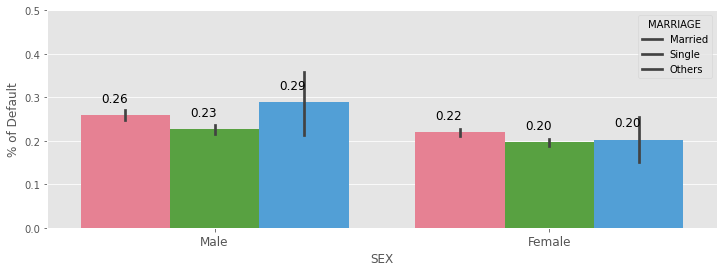

In [44]:
# Relationship between gender (SEX), marital status (MARRIAGE), and the percentage of credit card defaults.

plt.figure(figsize=(12, 4))

# Create a bar plot
ax = sns.barplot(x="SEX", y="def_pay", hue="MARRIAGE", data=df, palette='husl')
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)

# Customize x-axis labels
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)

# Add a legend for marital status (MARRIAGE)
plt.legend(['Married', 'Single', 'Others'], title='MARRIAGE')

for p in ax.patches:
    ax.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.06, p.get_height() + 0.03), fontsize=12)
plt.show()

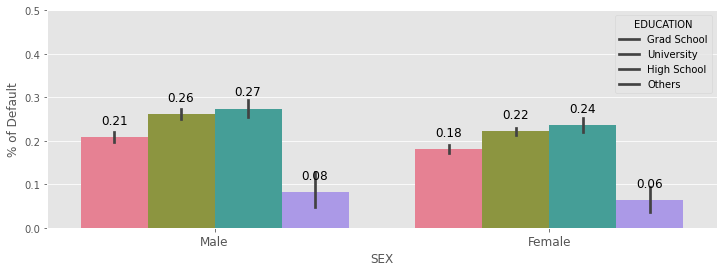

In [45]:
# The relationship between gender (SEX), educational background (EDUCATION), and the percentage of credit card defaults.

plt.figure(figsize=(12, 4))

# Create a bar plot
ax = sns.barplot(x="SEX", y="def_pay", hue="EDUCATION", data=df, palette='husl')

# Set y-axis label and limits
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)

# Customize x-axis labels
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)

# Add a legend for educational background (EDUCATION)
plt.legend(['Grad School', 'University', 'High School', 'Others'], title='EDUCATION')

# Annotate each bar with the percentage value
for p in ax.patches:
    ax.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.06, p.get_height() + 0.03), fontsize=12)
plt.show()

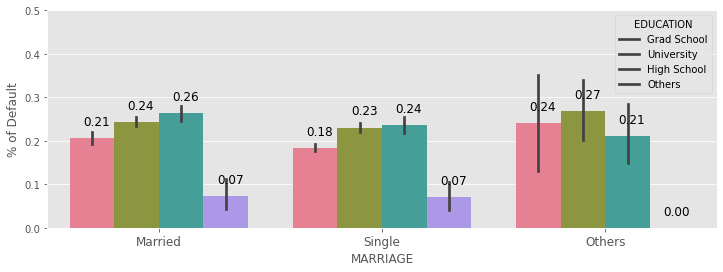

In [46]:
# The relationship between marital status (MARRIAGE), EDUCATION, and the percentage of credit card defaults.

plt.figure(figsize=(12, 4))

# Create a bar plot
ax = sns.barplot(x="MARRIAGE", y="def_pay", hue="EDUCATION", data=df, palette='husl')

# Set y-axis label and limits
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)

# Customize x-axis labels
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'], fontsize=12)

# Add a legend for educational background (EDUCATION)
plt.legend(['Grad School', 'University', 'High School', 'Others'], title='EDUCATION')

# Annotate each bar with the percentage value
for p in ax.patches:
    ax.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.06, p.get_height() + 0.03), fontsize=12)
plt.show()

###### Observations:

Gender, Marital Status, and Education: Being male, married, and having a high school education seems to increase the likelihood of being a defaulter. This suggests that the combination of these factors may lead to a higher risk of defaults.

Marital Status "Others" (Possibly Divorced Individuals): People who are marked as "Others" in their marital status (likely indicating divorced individuals) have a notable probability of around 0.29 for facing defaults. This is a relatively higher occurrence, indicating that divorced individuals have an increased risk of credit card defaults.

## Age Distribution of Credit Card Holders

Histogram that shows the distribution of ages along with the kernel density estimate (KDE) line, which provides a smoothed estimate of the age distribution.

<AxesSubplot:xlabel='AGE', ylabel='Count'>

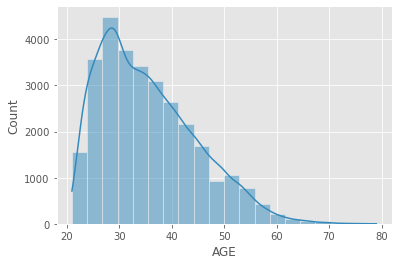

In [47]:
sns.histplot(df['AGE'], bins=20, kde=True)

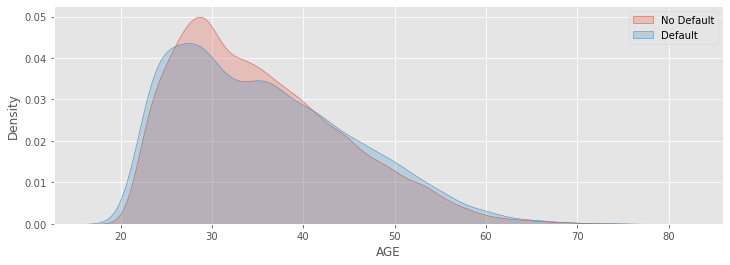

In [48]:
plt.figure(figsize=(12, 4))

# Create KDE plots for "No Default" and "Default" categories
sns.kdeplot(df.loc[(df['def_pay'] == 0), 'AGE'], label='No Default', fill=True)
sns.kdeplot(df.loc[(df['def_pay'] == 1), 'AGE'], label='Default', fill=True)

# Add a legend to distinguish the categories
plt.legend()

# Show the plot
plt.show()

###### Observation:

- Individuals in the age group between 20 to 30 years old are more likely to default on their credit card payments compared to other age groups.

In [49]:
# Count of individuals in each age group.
# Create age bins using pd.cut
df['AgeBin'] = pd.cut(df['AGE'], [20, 25, 30, 35, 40, 50, 60, 80])

# Count the number of individuals in each age bin
print(df['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


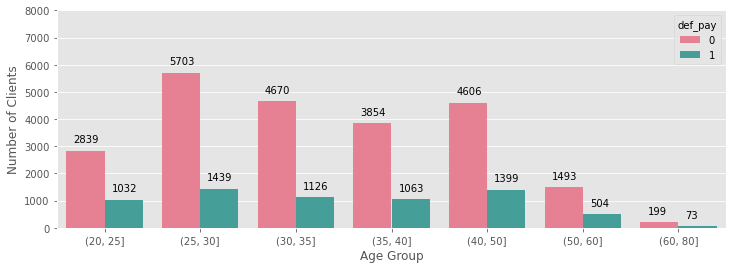

In [50]:
plt.figure(figsize=(12, 4))

# Convert the 'AgeBin' column to string type
df['AgeBin'] = df['AgeBin'].astype('str')

# Define the order of age groups
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

# Create a count plot
ax = sns.countplot(data=df, x='AgeBin', hue='def_pay', palette='husl', order=AgeBin_order)

# Set x-axis and y-axis labels and limits
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Clients", fontsize=12)
plt.ylim(0, 8000)

# Annotate each bar with the number of clients
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + 0.075, p.get_height() + 300))
plt.show()

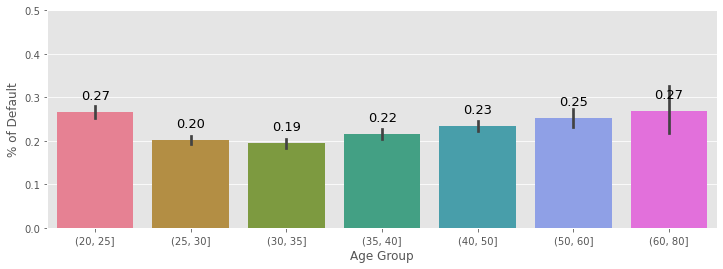

In [51]:
# Bar plot to visualize the percentage of credit card defaults within each age group.
plt.figure(figsize=(12, 4))

# Create a bar plot to show the percentage of defaults in each age group
ax = sns.barplot(x="AgeBin", y="def_pay", data=df, palette='husl',  order=AgeBin_order)

# Set x-axis and y-axis labels and limits
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)

# Annotate each bar with the percentage of defaults
for p in ax.patches:
    ax.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.03), fontsize=13)
plt.show()

###### Observation

-  Individuals aged between 20 and 25, as well as those above 50, are more prone to default on their credit card payments. In contrast, individuals within other age ranges show lower tendencies for default.

## Distribution of Credit Card Limits (LIMIT_BAL) of Credit Card Holders

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

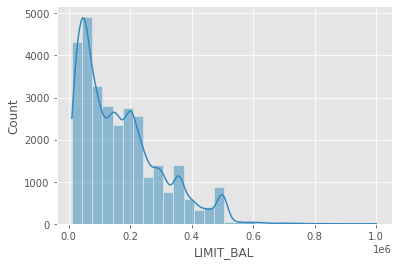

In [52]:
# Histogram plot to visualize the distribution of credit card limits (LIMIT_BAL), along with a KDE. 
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True)

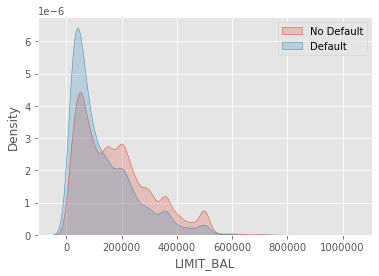

In [53]:
# Create KDE plots to compare the distribution of credit card limits for 'No Default' and 'Default' cases
sns.kdeplot(df.loc[(df['def_pay'] == 0), 'LIMIT_BAL'], label='No Default', fill=True)
sns.kdeplot(df.loc[(df['def_pay'] == 1), 'LIMIT_BAL'], label='Default', fill=True)

# Format the tick labels on the x-axis to be in plain style (no scientific notation)
plt.ticklabel_format(style='plain', axis='x')

# Add a legend to distinguish between 'No Default' and 'Default' KDE curves
plt.legend()
plt.show()

In [54]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

The majority of individuals have a credit limit below 250,000 New Taiwan (NT) dollars. However, there are some individuals with credit limits extending up to one million NT dollars. 

In [55]:
# Counts of individuals falling into different credit limit bins.
df['LimitBin'] = pd.cut(df['LIMIT_BAL'], [5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LimitBin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64


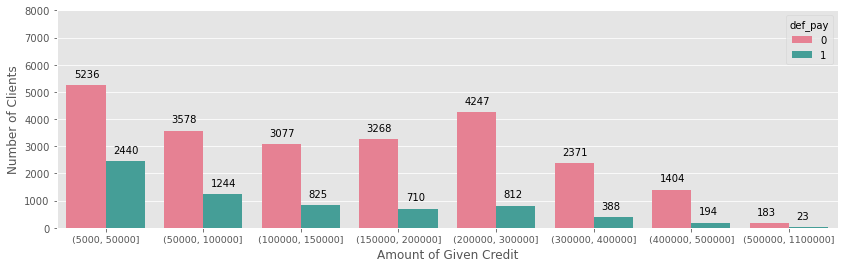

In [56]:
plt.figure(figsize=(14, 4))

# Convert the 'LimitBin' column to string type
df['LimitBin'] = df['LimitBin'].astype('str')

# Define the order of 'LimitBin' categories for plotting
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

# Create a count plot to show the number of clients in each 'LimitBin' category, with differentiation based on 'def_pay'
ax = sns.countplot(data=df, x='LimitBin', hue="def_pay", palette='husl', order=LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize=12)
plt.ylabel("Number of Clients", fontsize=12)
plt.ylim(0, 8000)

# Adjust the x-axis label font size
ax.tick_params(axis="x", labelsize=9.5)

# Annotate the count of clients in each category
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + 0.075, p.get_height() + 300))
plt.show()

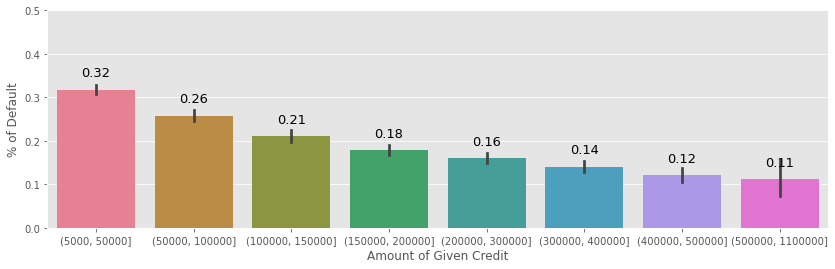

In [57]:
# To visualize the relationship between the amount of given credit ('LimitBin') and the % of defaulter ('def_pay').
plt.figure(figsize=(14, 4))

# Create a bar plot to show the percentage of defaults in each 'LimitBin' category
ax = sns.barplot(x="LimitBin", y="def_pay", data=df, palette='husl',  order=LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize=12)
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)

# Annotate the percentage of defaults for each category
for p in ax.patches:
    ax.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.03), fontsize=13)
plt.show()

###### Observations:

- Low Credit Limits and High Default Rate: Customers with credit limits of 50k NT dollars or less have a significant default rate, exceeding 30%. This suggests that clients with very low credit limits are more likely to default.

- Majority of Defaulters with Lower Credit Limits: Almost 60% of defaulters have credit limits lower than 100k NT dollars. This highlights that a substantial portion of clients facing default falls into the lower credit limit categories.

- Inverse Relationship Between Credit Limit and Default: There is an inverse relationship between credit limits and the likelihood of default. As the credit limit increases, the chance of defaulting decreases. 

In [58]:
# Groups the data by 'SEX', 'EDUCATION', 'MARRIAGE', and 'AgeBin'
# Group by and calculate mean for each category
mean_by_sex = df.groupby('SEX')['LIMIT_BAL'].mean()
mean_by_education = df.groupby('EDUCATION')['LIMIT_BAL'].mean()
mean_by_marriage = df.groupby('MARRIAGE')['LIMIT_BAL'].mean()
mean_by_age_bin = df.groupby('AgeBin')['LIMIT_BAL'].mean()

# Display mean LIMIT_BAL values for each category
print("Mean LIMIT_BAL by SEX:")
print(mean_by_sex)

print('----------------------')
print("\nMean LIMIT_BAL by EDUCATION:")
print(mean_by_education)

print('----------------------')
print("\nMean LIMIT_BAL by MARRIAGE:")
print(mean_by_marriage)

print('----------------------')
print("\nMean LIMIT_BAL by AGE_BIN:")
print(mean_by_age_bin)

Mean LIMIT_BAL by SEX:
SEX
1    163519.825034
2    170086.462014
Name: LIMIT_BAL, dtype: float64
----------------------

Mean LIMIT_BAL by EDUCATION:
EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    181316.239316
Name: LIMIT_BAL, dtype: float64
----------------------

Mean LIMIT_BAL by MARRIAGE:
MARRIAGE
1    182200.893184
2    156413.660737
3    103076.923077
Name: LIMIT_BAL, dtype: float64
----------------------

Mean LIMIT_BAL by AGE_BIN:
AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64


Generating the box plots to visualize the distribution of credit limits ('LIMIT_BAL') across different categories such as marital status ('MARRIAGE'), education level ('EDUCATION'), gender ('SEX'), and age groups ('AgeBin').

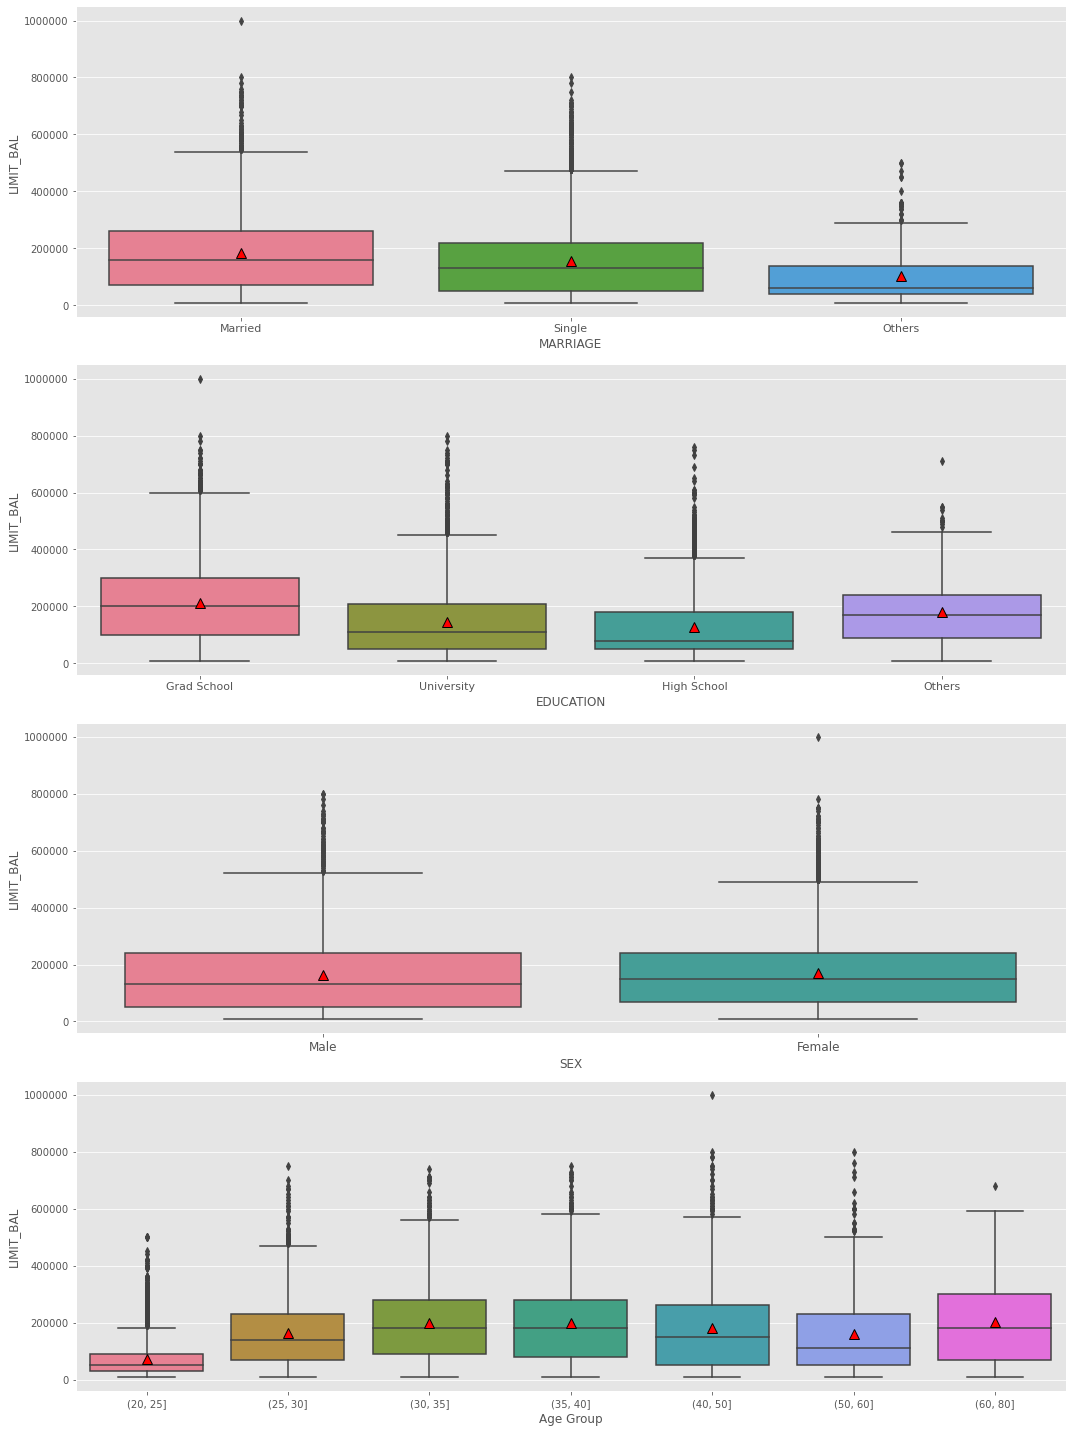

In [59]:
plt.figure(figsize=(15, 20))

# Subplot 1: Box plot for 'LIMIT_BAL' by 'MARRIAGE' category
plt.subplot(4, 1, 1)
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", data=df, palette='husl', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'], fontsize=11)

# Subplot 2: Box plot for 'LIMIT_BAL' by 'EDUCATION' category
plt.subplot(4, 1, 2)
sns.boxplot(x="EDUCATION", y="LIMIT_BAL", data=df, palette='husl', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3], ['Grad School', 'University', 'High School', 'Others'], fontsize=11)

# Subplot 3: Box plot for 'LIMIT_BAL' by 'SEX' category
plt.subplot(4, 1, 3)
sns.boxplot(x="SEX", y="LIMIT_BAL", data=df, palette='husl', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)

# Subplot 4: Box plot for 'LIMIT_BAL' by 'AgeBin' category
plt.subplot(4, 1, 4)
sns.boxplot(x="AgeBin", y="LIMIT_BAL", data=df, palette='husl', showmeans=True, order=AgeBin_order,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Age Group", fontsize=12)

plt.tight_layout()
plt.show()

###### Observation:
- The individual with the highest credit limit in the dataset is a female, married, and falls into the 40 to 50 age group. 

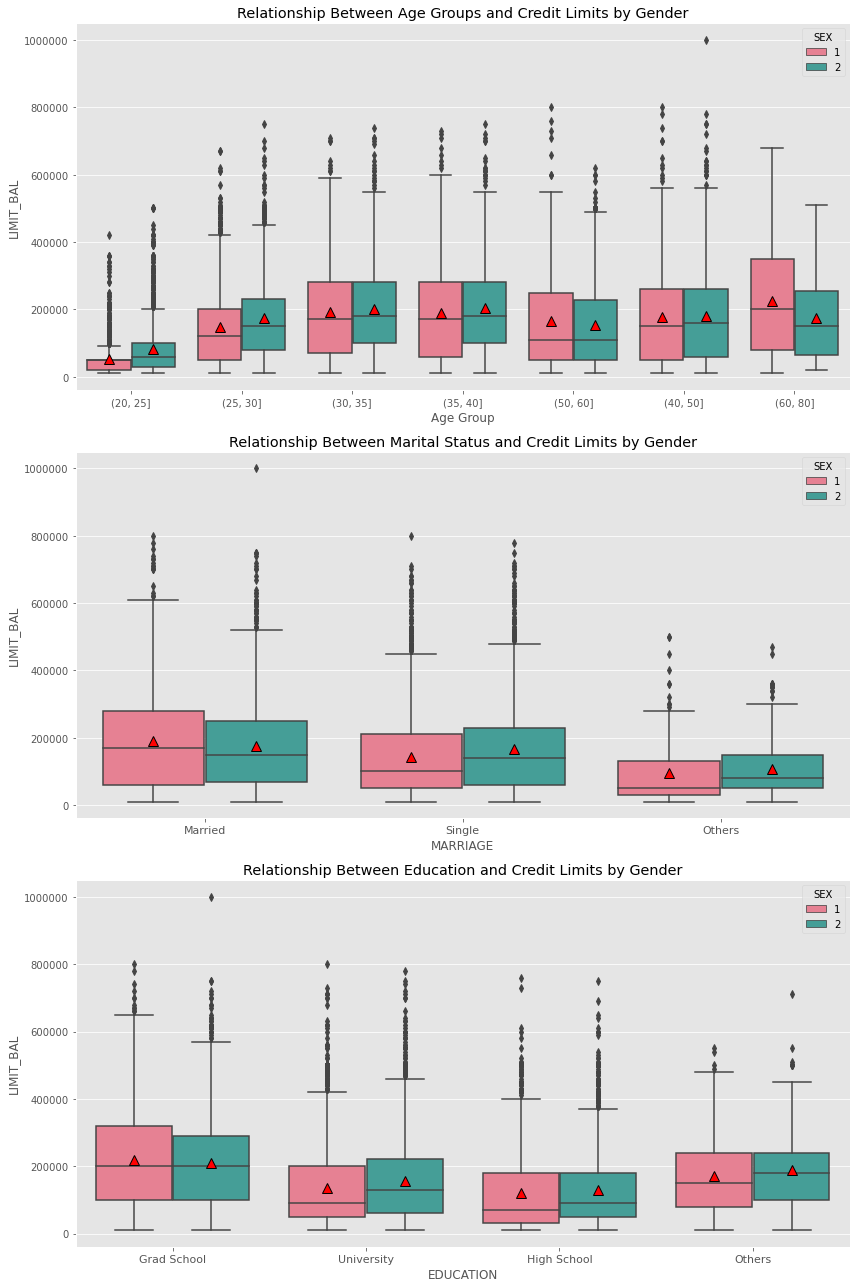

In [60]:
# Create a boxplot to analyze the relationship between age groups and credit limits by gender
plt.figure(figsize=(12, 18))

# Subplot for AgeBin
plt.subplot(3, 1, 1)
sns.boxplot(x="AgeBin", y="LIMIT_BAL", hue='SEX', data=df, palette='husl', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.title("Relationship Between Age Groups and Credit Limits by Gender")
plt.xlabel("Age Group", fontsize=12)

# Subplot for Marriage
plt.subplot(3, 1, 2)
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", hue='SEX', data=df, palette='husl', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'], fontsize=11)
plt.title("Relationship Between Marital Status and Credit Limits by Gender")

# Subplot for Education
plt.subplot(3, 1, 3)
sns.boxplot(x="EDUCATION", y="LIMIT_BAL", hue='SEX', data=df, palette='husl', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3], ['Grad School', 'University', 'High School', 'Others'], fontsize=11)
plt.title("Relationship Between Education and Credit Limits by Gender")

plt.tight_layout()
plt.show()

######Observations: 

- Gender: On average, women have slightly higher credit limits than men. This trend generally holds across various combinations of categories.

- Grad School Diploma: Customers with a graduate school diploma, regardless of their gender, tend to have credit limits that are not significantly affected by gender differences.

- Marital Status: For married individuals, there is not a significant difference in credit limits between men and women.

- Age: Customers who are 50 years old or older have similar credit limits regardless of their gender.

## Correlation Heatmap of Credit Card Default Data

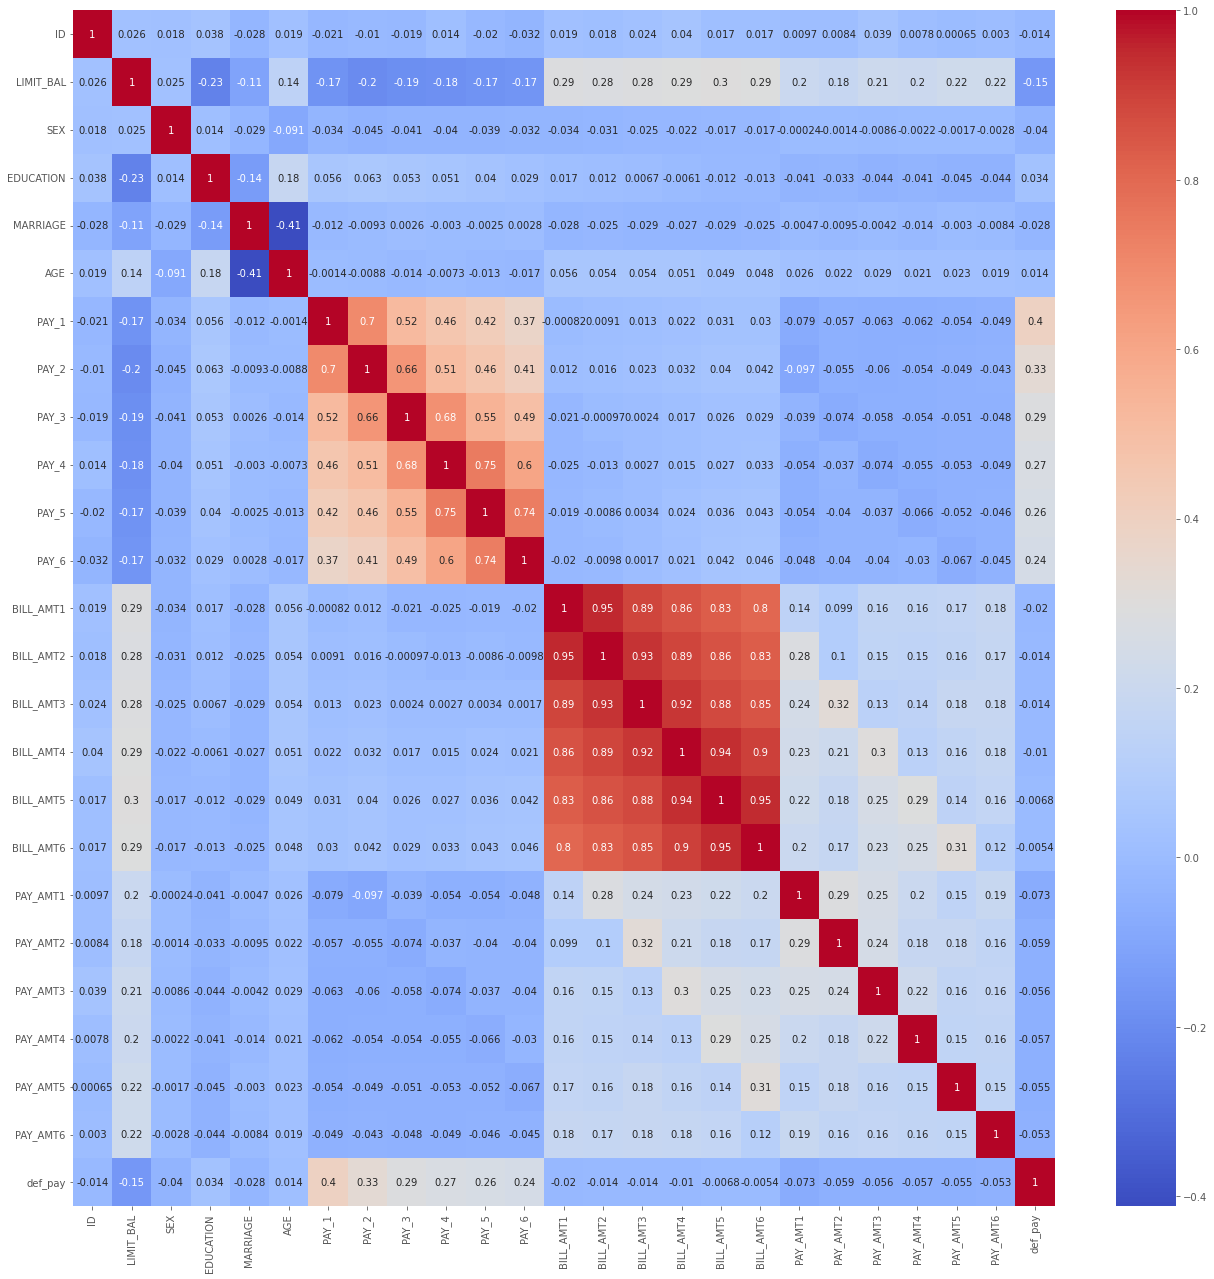

In [47]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

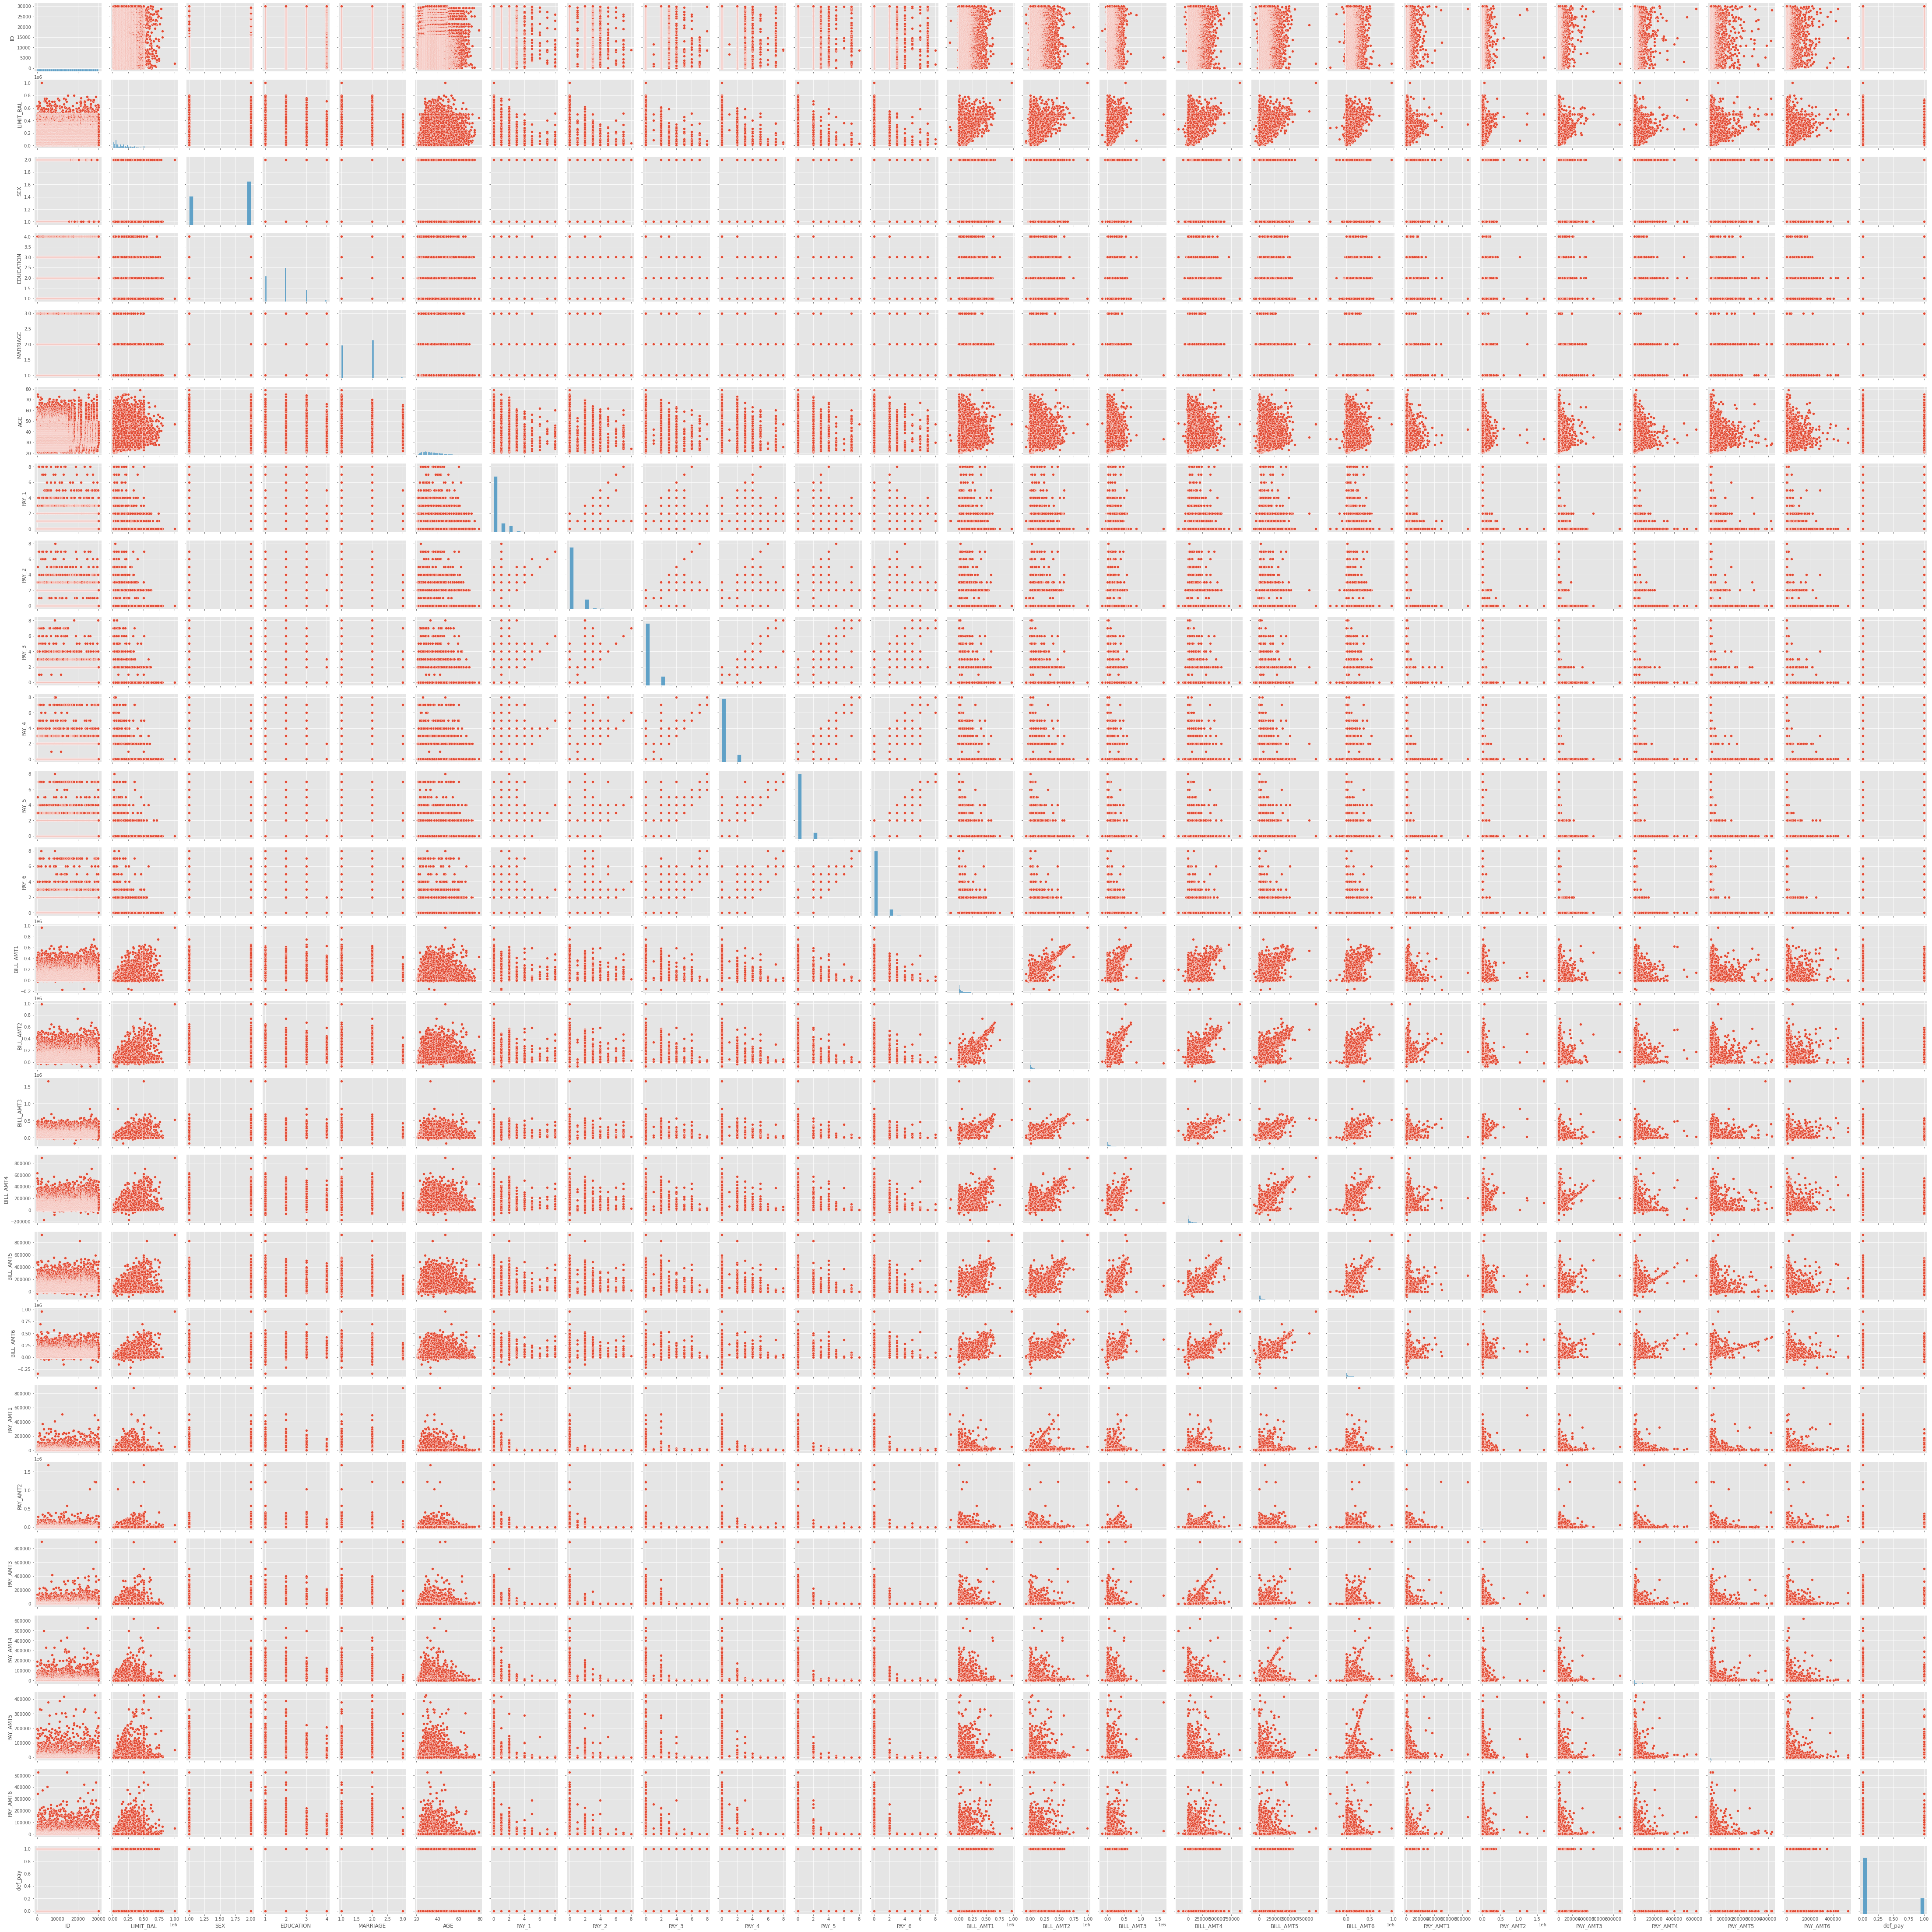

In [48]:
# Pairplot
sns.pairplot(df)
plt.show()

###### Observation: 
- The heatmap reveals that certain features in the dataset are positively correlated with each other, indicating collinearity. Specifically, features like PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, and PAY_6 are positively correlated. Similarly, features BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, and BILL_AMT6 also exhibit positive correlations.

# Analysis Summary

- Repayment Behavior: Individuals with a history of payment delays for more than 4 months have a significantly high chance of default, approximately 70%.
- Bill Statement:Individuals with negative bill statements (credit balance) are less likely to default.
- Previous Payment Amounts:Individuals with very low previous payment amounts, nearly 0, have a higher likelihood of default, around 30%.
- Education Level:As the education level decreases, the credit limit balance also decreases, and the chance of default increases.
- Marital Status:Individuals with a marital status of "Others" (possibly indicating divorced individuals) have a notably higher chance of default, approximately 30%.
- Age Group:People belonging to the age group of 20 to 25 and those above 50 have a higher likelihood of default, around 27%.
- Credit Limit:Individuals with higher credit limits are less prone to default, while those with credit limits below 50k dollars have a high likelihood of default, almost 32%.

# Model Building 

#### Decision Tree Model

In [49]:
# Assigning the values of input & and output variables
x = df[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1',
             'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
             'PAY_AMT5','PAY_AMT6']]

y = df['def_pay']

In [50]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.7,random_state = 47)

In [51]:
# Train test shape
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (9000, 23)
x_test: (21000, 23)
y_train: (9000,)
y_test: (21000,)


In [52]:
# Hyperparameter grid 
param_grid = {
    'max_depth': [3, 5,None],
    'min_samples_split': [2, 5, 10, 20]}

# Creating the DecisionTreeClassifier and GridSearchCV objects
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [53]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_accuracy)

Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8124444444444444


In [54]:
# Model Building 
model = DecisionTreeClassifier(max_depth = 3,min_samples_split = 2 )
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
y_pred = model.predict(x_test)

In [56]:
# Train test accuracy
train = model.predict(x_train)
train_acc = accuracy_score(y_train,train)

test = model.predict(x_test)
test_acc = accuracy_score(y_test,test)

print('Train_accuracy:',train_acc)
print('Test_accuracy:',test_acc)

Train_accuracy: 0.8144444444444444
Test_accuracy: 0.822047619047619


In [57]:
# Accuracy score
print('Accuracy_score:', accuracy_score(y_test,y_pred))

Accuracy_score: 0.822047619047619


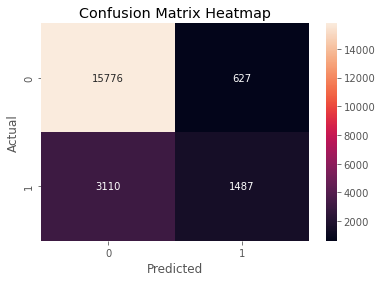

In [58]:
# Confusion matrix
conf = confusion_matrix(y_test,y_pred)

# Heatmap for confusion matrix
sns.heatmap(conf, annot=True, fmt="d", cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()